# Nodo,Bajas,Poblacion,% Bajas,% Poblacion,Ganancia*,% Acum Bajas,% Acum Poblacion
27,778,15768,27.97,4.20,6.66,27.97,4.20
22,49,1734,1.76,0.46,3.81,29.73,4.66
25,268,9915,9.63,2.64,3.65,39.36,7.30
18,177,6871,6.36,1.83,3.47,45.73,9.14
6,448,18287,16.10,4.87,3.30,61.83,14.01
23,247,21330,8.88,5.69,1.56,70.71,19.70
28,24,2946,0.86,0.79,1.10,71.57,20.48
26,36,5732,1.29,1.53,0.85,72.87,22.01
20,56,9211,2.01,2.45,0.82,74.88,24.46
24,90,20260,3.24,5.40,0.60,78.11,29.86


<IPython.core.display.Latex object>

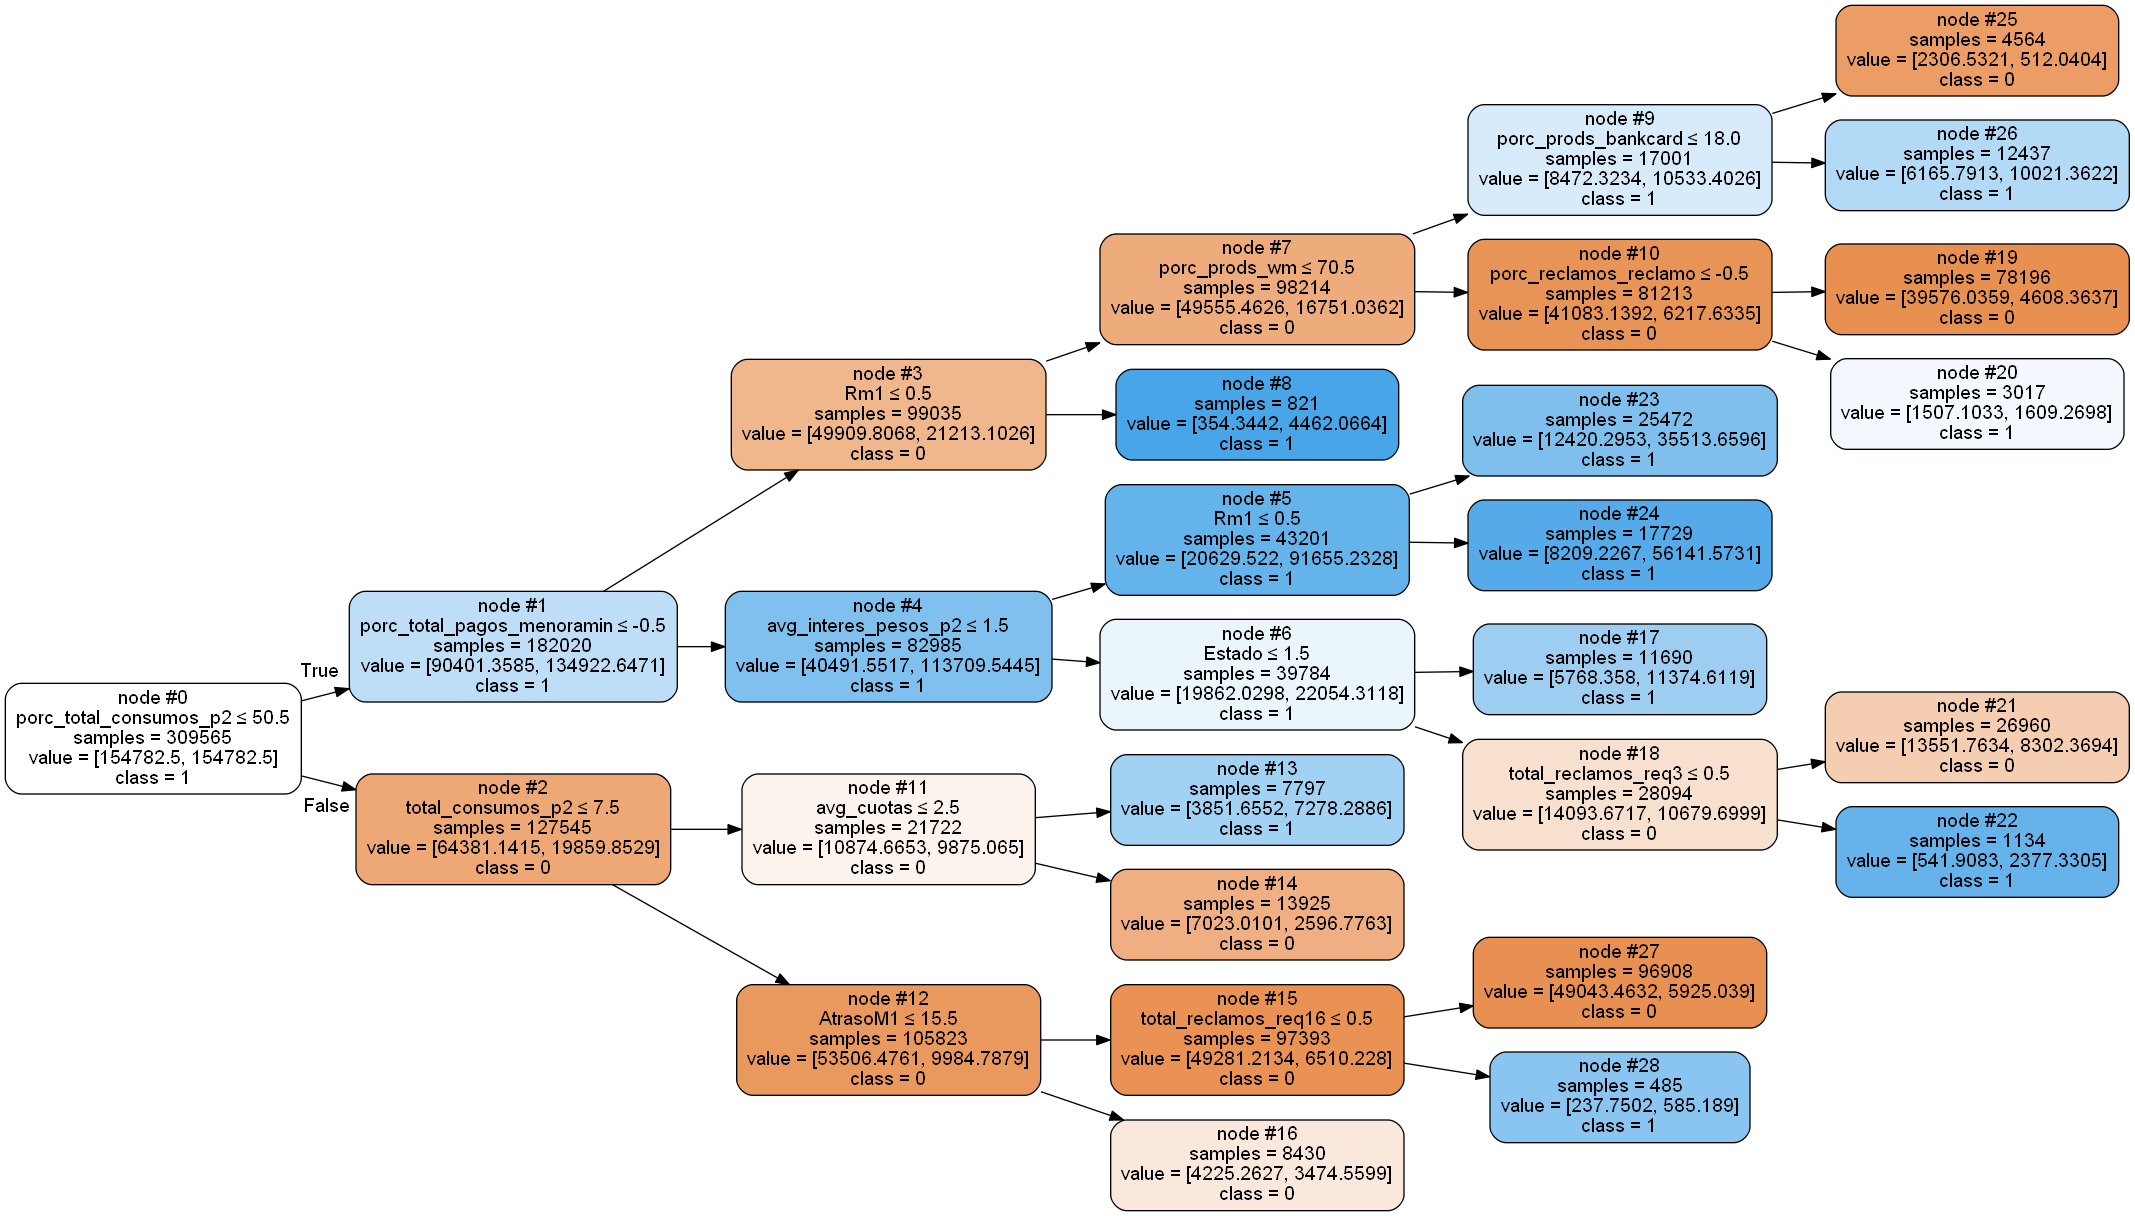

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import StringIO
import pydotplus
from IPython.display import Image
from sklearn import tree
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from IPython.core.display import display, HTML


# Tree
strHTML = "<h2 align='center' style='padding: 2px'>CORDIAL - Modelo de prediccion de bajas</h2>"
strHTML += "<h4 align='center' style='padding: 2px'>Version 3.0 </h4>"
strHTML += "<h4 align='center' style='padding: 2px'><br>Septiembre 2017</h4>"#display(HTML(strHTML))

display(HTML(strHTML))

# Leo file
data = pd.read_csv('c:/r/tableau.rpt', sep=",", header = None)

# Etiqueto variables
data.columns = ["id","baja","Id_Cli_Provincia","Edad","Sexo","Nacionalidad","Ocupacion","Estado_Civil","Cant_Hijos","Condicion_Prop","Estado","Rm1","Rm2","Rm3","Rm4","Rm5","Rm6","Ingreso","CompraLimiValor","Relacion_Lim_Ing","Atraso_Max_Hist","AtrasoM6","AtrasoM5","AtrasoM4","AtrasoM3","AtrasoM2","AtrasoM1","total_prods","total_prods_refi","porc_prods_refi","total_prods_cartaa","porc_prods_cartaa","total_prods_wm","porc_prods_wm","total_prods_hipert","porc_prods_hipert","total_prods_emple","porc_prods_emple","total_prods_efectivo","porc_prods_efectivo","total_prods_consumo","porc_prods_consumo","total_prods_plcc","porc_prods_plcc","total_prods_bankcard","porc_prods_bankcard","total_reclamos","avg_dias","avg_dias_reclamo","avg_dias_consulta","total_reclamos_reclamo","porc_reclamos_reclamo","total_reclamos_consulta","porc_reclamos_consulta","total_reclamos_canal1","total_reclamos_canal7","total_reclamos_canal3","total_reclamos_canal22","total_reclamos_canal19","total_reclamos_canal29","total_reclamos_canal33","total_reclamos_canal13","total_reclamos_canal35","total_reclamos_canal32","total_reclamos_walmart","total_reclamos_ta","total_reclamos_hiper","total_reclamos_na","total_reclamos_cordial","total_reclamos_refi","total_reclamos_estado2","porc_reclamos_estado2","total_reclamos_estado3","porc_reclamos_estado3","total_reclamos_estado4","porc_reclamos_estado4","total_reclamos_categoria4","porc_reclamos_categoria4","total_reclamos_categoria5","porc_reclamos_categoria5","total_reclamos_categoria6","porc_reclamos_categoria6","total_reclamos_categoria20","porc_reclamos_categoria20","total_reclamos_req1","total_reclamos_req2","total_reclamos_req3","total_reclamos_req4","total_reclamos_req5","total_reclamos_req6","total_reclamos_req7","total_reclamos_req8","total_reclamos_req9","total_reclamos_req10","total_reclamos_req11","total_reclamos_req12","total_reclamos_req13","total_reclamos_req14","total_reclamos_req15","total_reclamos_req16","total_reclamos_req17","total_reclamos_req18","total_reclamos_req19","total_reclamos_req20","total_reclamos_req21","total_reclamos_req22","total_reclamos_req23","total_reclamos_req24","total_reclamos_req25","total_reclamos_req26","total_reclamos_req27","total_reclamos_req28","total_reclamos_req29","total_reclamos_req30","total_reclamos_req31","total_reclamos_req32","total_reclamos_req33","total_reclamos_req34","total_reclamos_req35","total_reclamos_req36","total_reclamos_req37","total_reclamos_req38","total_reclamos_req39","total_reclamos_req40","total_reclamos_req41","total_reclamos_req42","total_reclamos_req43","total_reclamos_req44","total_reclamos_req45","total_reclamos_req46","total_reclamos_req47","total_reclamos_req48","total_reclamos_req49","total_reclamos_req50","total_reclamos_req51","total_reclamos_req52","total_reclamos_req53","total_reclamos_req54","total_reclamos_req55","total_reclamos_req56","total_reclamos_req57","total_reclamos_req58","total_reclamos_req59","total_reclamos_req60","total_reclamos_req61","total_reclamos_req62","total_reclamos_req63","total_reclamos_req64","total_reclamos_req65","total_reclamos_req66","total_reclamos_req67","total_reclamos_req68","total_reclamos_req69","total_reclamos_req70","total_reclamos_req71","total_reclamos_req72","total_consumos","total_consumos_p1","total_consumos_p2","porc_total_consumos_p2","total_consumos_pesos","total_consumos_pesos_p1","total_consumos_pesos_p2","porc_consumos_pesos","total_consumos_dolares","total_consumos_dolares_p1","total_consumos_dolares_p2","porc_consumos_dolares","porc_total_consumos_dolares_p2","avg_importe_pesos","avg_importe_pesos_p1","avg_importe_pesos_p2","porc_avg_importe_pesos_p2","avg_importe_dolares","avg_importe_dolares_p1","avg_importe_dolares_p2","porc_avg_importe_dolares_p2","avg_interes_pesos","avg_interes_pesos_p1","avg_interes_pesos_p2","porc_avg_interes_pesos_p2","avg_interes_dolares","avg_interes_dolares_p1","avg_interes_dolares_p2","porc_avg_interes_dolares_p2","avg_relacion_interes_pesos","avg_relacion_interes_pesos_p1","avg_relacion_interes_pesos_p2","porc_avg_relacion_interes_pesos_p2","avg_relacion_interes_dolares","avg_relacion_interes_dolares_p1","avg_relacion_interes_dolares_p2","porc_avg_relacion_interes_dolares_p2","avg_cuotas","avg_cuotas_p1","avg_cuotas_p2","porc_avg_cuotas_p2","total_pagos","total_pagos_p1","total_pagos_p2","porc_total_pagos_p2","total_pagos_vencidos","total_pagos_vencidos_p1","total_pagos_vencidos_p2","porc_total_pagos_vencidos_p2","porc_total_pagos_vencidos","total_pagos_menorasaldo","total_pagos_menorasaldo_p1","total_pagos_menorasaldo_p2","porc_total_pagos_menorasaldo_p2","porc_total_pagos_menorasaldo","total_pagos_menoramin","total_pagos_menoramin_p1","total_pagos_menoramin_p2","porc_total_pagos_menoramin_p2","porc_total_pagos_menoramin","relacion_pago_saldo","total_pagospl","total_pagospl_p1","total_pagospl_p2","porc_total_pagospl_p2","total_pagospl_venc1","total_pagospl_p1_venc1","total_pagospl_p2_venc1","porc_total_pagospl_venc1_p2","porc_total_pagospl_venc1","total_pagospl_venc2","total_pagospl_p1_venc2","total_pagospl_p2_venc2","porc_total_pagospl_venc2_p2","porc_total_pagospl_venc2"]

# Predictors
X = data[['Id_Cli_Provincia','Edad','Sexo','Nacionalidad','Ocupacion','Estado_Civil','Cant_Hijos','Condicion_Prop','Estado','Rm1','Rm2','Rm3','Rm4','Rm5','Rm6','Ingreso','CompraLimiValor','Relacion_Lim_Ing','Atraso_Max_Hist','AtrasoM6','AtrasoM5','AtrasoM4','AtrasoM3','AtrasoM2','AtrasoM1','total_prods','total_prods_refi','porc_prods_refi','total_prods_cartaa','porc_prods_cartaa','total_prods_wm','porc_prods_wm','total_prods_hipert','porc_prods_hipert','total_prods_emple','porc_prods_emple','total_prods_efectivo','porc_prods_efectivo','total_prods_consumo','porc_prods_consumo','total_prods_plcc','porc_prods_plcc','total_prods_bankcard','porc_prods_bankcard','total_reclamos','avg_dias','avg_dias_reclamo','avg_dias_consulta','total_reclamos_reclamo','porc_reclamos_reclamo','total_reclamos_consulta','porc_reclamos_consulta','total_reclamos_canal1','total_reclamos_canal7','total_reclamos_canal3','total_reclamos_canal22','total_reclamos_canal19','total_reclamos_canal29','total_reclamos_canal33','total_reclamos_canal13','total_reclamos_canal35','total_reclamos_canal32','total_reclamos_walmart','total_reclamos_ta','total_reclamos_hiper','total_reclamos_na','total_reclamos_cordial','total_reclamos_refi','total_reclamos_estado2','porc_reclamos_estado2','total_reclamos_estado3','porc_reclamos_estado3','total_reclamos_estado4','porc_reclamos_estado4','total_reclamos_categoria4','porc_reclamos_categoria4','total_reclamos_categoria5','porc_reclamos_categoria5','total_reclamos_categoria6','porc_reclamos_categoria6','total_reclamos_categoria20','porc_reclamos_categoria20','total_reclamos_req1','total_reclamos_req2','total_reclamos_req3','total_reclamos_req4','total_reclamos_req5','total_reclamos_req6','total_reclamos_req7','total_reclamos_req8','total_reclamos_req9','total_reclamos_req10','total_reclamos_req11','total_reclamos_req12','total_reclamos_req13','total_reclamos_req14','total_reclamos_req15','total_reclamos_req16','total_reclamos_req17','total_reclamos_req18','total_reclamos_req19','total_reclamos_req20','total_reclamos_req21','total_reclamos_req22','total_reclamos_req23','total_reclamos_req24','total_reclamos_req25','total_reclamos_req26','total_reclamos_req27','total_reclamos_req28','total_reclamos_req29','total_reclamos_req30','total_reclamos_req31','total_reclamos_req32','total_reclamos_req33','total_reclamos_req34','total_reclamos_req35','total_reclamos_req36','total_reclamos_req37','total_reclamos_req38','total_reclamos_req39','total_reclamos_req40','total_reclamos_req41','total_reclamos_req42','total_reclamos_req43','total_reclamos_req44','total_reclamos_req45','total_reclamos_req46','total_reclamos_req47','total_reclamos_req48','total_reclamos_req49','total_reclamos_req50','total_reclamos_req51','total_reclamos_req52','total_reclamos_req53','total_reclamos_req54','total_reclamos_req55','total_reclamos_req56','total_reclamos_req57','total_reclamos_req58','total_reclamos_req59','total_reclamos_req60','total_reclamos_req61','total_reclamos_req62','total_reclamos_req63','total_reclamos_req64','total_reclamos_req65','total_reclamos_req66','total_reclamos_req67','total_reclamos_req68','total_reclamos_req69','total_reclamos_req70','total_reclamos_req71','total_reclamos_req72','total_consumos','total_consumos_p1','total_consumos_p2','porc_total_consumos_p2','total_consumos_pesos','total_consumos_pesos_p1','total_consumos_pesos_p2','porc_consumos_pesos','total_consumos_dolares','total_consumos_dolares_p1','total_consumos_dolares_p2','porc_consumos_dolares','porc_total_consumos_dolares_p2','avg_importe_pesos','avg_importe_pesos_p1','avg_importe_pesos_p2','porc_avg_importe_pesos_p2','avg_importe_dolares','avg_importe_dolares_p1','avg_importe_dolares_p2','porc_avg_importe_dolares_p2','avg_interes_pesos','avg_interes_pesos_p1','avg_interes_pesos_p2','porc_avg_interes_pesos_p2','avg_interes_dolares','avg_interes_dolares_p1','avg_interes_dolares_p2','porc_avg_interes_dolares_p2','avg_relacion_interes_pesos','avg_relacion_interes_pesos_p1','avg_relacion_interes_pesos_p2','porc_avg_relacion_interes_pesos_p2','avg_relacion_interes_dolares','avg_relacion_interes_dolares_p1','avg_relacion_interes_dolares_p2','porc_avg_relacion_interes_dolares_p2','avg_cuotas','avg_cuotas_p1','avg_cuotas_p2','porc_avg_cuotas_p2','total_pagos','total_pagos_p1','total_pagos_p2','porc_total_pagos_p2','total_pagos_vencidos','total_pagos_vencidos_p1','total_pagos_vencidos_p2','porc_total_pagos_vencidos_p2','porc_total_pagos_vencidos','total_pagos_menorasaldo','total_pagos_menorasaldo_p1','total_pagos_menorasaldo_p2','porc_total_pagos_menorasaldo_p2','porc_total_pagos_menorasaldo','total_pagos_menoramin','total_pagos_menoramin_p1','total_pagos_menoramin_p2','porc_total_pagos_menoramin_p2','porc_total_pagos_menoramin','relacion_pago_saldo','total_pagospl','total_pagospl_p1','total_pagospl_p2','porc_total_pagospl_p2','total_pagospl_venc1','total_pagospl_p1_venc1','total_pagospl_p2_venc1','porc_total_pagospl_venc1_p2','porc_total_pagospl_venc1','total_pagospl_venc2','total_pagospl_p1_venc2','total_pagospl_p2_venc2','porc_total_pagospl_venc2_p2','porc_total_pagospl_venc2']]

# Class
y = data[['baja']]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=0)

# Model
clf2 = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=50,min_samples_split=20, criterion='gini', max_leaf_nodes=15,class_weight='balanced')

# Fit
clf2 = clf2.fit(X_train, y_train)

# Predict
clf3 = clf2.predict_proba(X_test)
#clf3 = clf2.predict_proba(X_train)


#strHTML = "<h2 style='padding: 10px'>Tablita de Ganacia</h2>"
strHTML = "<br><h3 align='left' style='padding: 2px'>:1: Objetivo</h2>"

strHTML += "<p>Se intenta realizar un nuevo modelo mas sencillo sin perder demasiada performance.</p>"
strHTML += "<p>Se utilizan exactamente las mismas variables que para la version 2.0.</p>"

strHTML += "<br><h3 align='left' style='padding: 2px'>:2: Modelo</h2>"
strHTML +="<table class='table table-striped'>"
strHTML +="<thead> <tr> <th># Nodo</th> <th>Bajas</th> <th>Poblacion</th> <th>% Bajas</th> <th>% Poblacion</th><th>Ganancia*</th><th>% Acum Bajas</th><th>% Acum Poblacion</th> </tr> </thead>"
strHTML +="<tbody>"
strHTML +="<tr> <th scope='row'>27	</th><td>778	</td><td>15768</td><td>	27.97</td><td>	4.20</td><td>	6.66</td><td>	27.97</td><td>	4.20</td></tr>"
strHTML +="<tr> <th scope='row'>22	</th><td>49	</td><td>1734</td><td>	1.76</td><td>	0.46</td><td>	3.81</td><td>	29.73</td><td>	4.66</td></tr>"
strHTML +="<tr> <th scope='row'>25	</th><td>268	</td><td>9915</td><td>	9.63</td><td>	2.64</td><td>	3.65</td><td>	39.36</td><td>	7.30</td></tr>"
strHTML +="<tr> <th scope='row'>18	</th><td>177	</td><td>6871</td><td>	6.36</td><td>	1.83</td><td>	3.47</td><td>	45.73</td><td>	9.14</td></tr>"
strHTML +="<tr> <th scope='row'>6	</th><td>448	</td><td>18287</td><td>	16.10</td><td>	4.87</td><td>	3.30</td><td>	61.83</td><td>	14.01</td></tr>"
strHTML +="<tr> <th scope='row'>23	</th><td>247	</td><td>21330</td><td>	8.88</td><td>	5.69</td><td>	1.56</td><td>	70.71</td><td>	19.70</td></tr>"
strHTML +="<tr> <th scope='row'>28	</th><td>24	</td><td>2946</td><td>	0.86</td><td>	0.79</td><td>	1.10</td><td>	71.57</td><td>	20.48</td></tr>"
strHTML +="<tr> <th scope='row'>26	</th><td>36	</td><td>5732</td><td>	1.29</td><td>	1.53</td><td>	0.85</td><td>	72.87</td><td>	22.01</td></tr>"
strHTML +="<tr> <th scope='row'>20	</th><td>56	</td><td>9211</td><td>	2.01</td><td>	2.45</td><td>	0.82</td><td>	74.88</td><td>	24.46</td></tr>"
strHTML +="<tr> <th scope='row'>24	</th><td>90	</td><td>20260</td><td>	3.24</td><td>	5.40</td><td>	0.60</td><td>	78.11</td><td>	29.86</td></tr>"
strHTML +="<tr> <th scope='row'>21	</th><td>374	</td><td>98951</td><td>	13.44</td><td>	26.37</td><td>	0.51</td><td>	91.56</td><td>	56.24</td></tr>"
strHTML +="<tr> <th scope='row'>10	</th><td>81	</td><td>43180</td><td>	2.91</td><td>	11.51</td><td>	0.25</td><td>	94.47</td><td>	67.74</td></tr>"
strHTML +="<tr> <th scope='row'>17	</th><td>9	</td><td>6962</td><td>	0.32</td><td>	1.86</td><td>	0.17</td><td>	94.79</td><td>	69.60</td></tr>"
strHTML +="<tr> <th scope='row'>8	</th><td>137	</td><td>106863</td><td>4.92</td><td>	28.48</td><td>	0.17</td><td>	99.72</td><td>	98.08</td></tr>"
strHTML +="<tr> <th scope='row'>14	</th><td>8	</td><td>7185</td><td>	0.29</td><td>	1.92</td><td>	0.15</td><td>	100.00</td><td>	100.00</td></tr>"
strHTML +="</tbody> </table>"
display(HTML(strHTML))

from IPython.display import display, Math, Latex
display(Latex(r"""\begin{eqnarray}
Ganancia^* = \frac{(\frac{Bajas}{Poblacion})}{(\frac{Total Bajas}{Total Poblacion})}\,
\end{eqnarray}"""))

# Calculate fpr, tpr
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values, clf3[:,1])
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train.values, clf3[:,1])

### GAIN
gain_x = [0,0.27,5.99,6.36,14.59,14.74,18.52,21.04,25.06,26.03,28.75,37.46,41.96,43.44,74.74,100.00]
gain_y = [0,2.88,39.15,40.69,63.63,64.01,71.36,76.06,82.54,83.58,85.82,91.19,92.86,93.19,97.02,100.00]

roc_auc = auc(gain_x, gain_y) / 10000
roc_auc2 = auc(false_positive_rate, true_positive_rate)

#strHTML = "<p>El modelo (arbol) agrupa en distintos nodos los clientes discriminando lo más posible los que se dan de baja de los que no. La tabla muestra los nodos ordenados segun el indice de ganancia (cuanto más lejos de 1 mejor).</p>"
#strHTML += "<p><font color=blue>Reglas principales</font></p>"
#strHTML += "<p><font size=1><b>Nodo #12</b><br> ::Cantidades<br>4,67% de todos los casos<br>26,59% de todas las bajas<br>Ganancia: 5,69<br>::Regla <br>Cantidad_Productos_Agrup5_Trend <= 0,5 AND Capital_Consumos_P2 <= 186,55 AND Dias_Reclamos_Trend > 0,5 AND Cantidad_Consumos_P2 <= 11,5 AND Cantidad_Productos_Trend <= 2,5 <br><br>Si no tiene productos de refinanciación en los úlitmos doce meses Y Realizó consumos por menos de AR$ 186,55 en menos de 12 veces en los últimos seis meses Y Realizó al menos un reclamo en los últimos doce meses Y Mantuvo o disminuyó la cantidad de productos en los últimos 12 meses </font></p>"
#display(HTML(strHTML))


dot_data = StringIO.StringIO()  
tree.export_graphviz(clf2, out_file=dot_data,  
                     feature_names=['Id_Cli_Provincia','Edad','Sexo','Nacionalidad','Ocupacion','Estado_Civil','Cant_Hijos','Condicion_Prop','Estado','Rm1','Rm2','Rm3','Rm4','Rm5','Rm6','Ingreso','CompraLimiValor','Relacion_Lim_Ing','Atraso_Max_Hist','AtrasoM6','AtrasoM5','AtrasoM4','AtrasoM3','AtrasoM2','AtrasoM1','total_prods','total_prods_refi','porc_prods_refi','total_prods_cartaa','porc_prods_cartaa','total_prods_wm','porc_prods_wm','total_prods_hipert','porc_prods_hipert','total_prods_emple','porc_prods_emple','total_prods_efectivo','porc_prods_efectivo','total_prods_consumo','porc_prods_consumo','total_prods_plcc','porc_prods_plcc','total_prods_bankcard','porc_prods_bankcard','total_reclamos','avg_dias','avg_dias_reclamo','avg_dias_consulta','total_reclamos_reclamo','porc_reclamos_reclamo','total_reclamos_consulta','porc_reclamos_consulta','total_reclamos_canal1','total_reclamos_canal7','total_reclamos_canal3','total_reclamos_canal22','total_reclamos_canal19','total_reclamos_canal29','total_reclamos_canal33','total_reclamos_canal13','total_reclamos_canal35','total_reclamos_canal32','total_reclamos_walmart','total_reclamos_ta','total_reclamos_hiper','total_reclamos_na','total_reclamos_cordial','total_reclamos_refi','total_reclamos_estado2','porc_reclamos_estado2','total_reclamos_estado3','porc_reclamos_estado3','total_reclamos_estado4','porc_reclamos_estado4','total_reclamos_categoria4','porc_reclamos_categoria4','total_reclamos_categoria5','porc_reclamos_categoria5','total_reclamos_categoria6','porc_reclamos_categoria6','total_reclamos_categoria20','porc_reclamos_categoria20','total_reclamos_req1','total_reclamos_req2','total_reclamos_req3','total_reclamos_req4','total_reclamos_req5','total_reclamos_req6','total_reclamos_req7','total_reclamos_req8','total_reclamos_req9','total_reclamos_req10','total_reclamos_req11','total_reclamos_req12','total_reclamos_req13','total_reclamos_req14','total_reclamos_req15','total_reclamos_req16','total_reclamos_req17','total_reclamos_req18','total_reclamos_req19','total_reclamos_req20','total_reclamos_req21','total_reclamos_req22','total_reclamos_req23','total_reclamos_req24','total_reclamos_req25','total_reclamos_req26','total_reclamos_req27','total_reclamos_req28','total_reclamos_req29','total_reclamos_req30','total_reclamos_req31','total_reclamos_req32','total_reclamos_req33','total_reclamos_req34','total_reclamos_req35','total_reclamos_req36','total_reclamos_req37','total_reclamos_req38','total_reclamos_req39','total_reclamos_req40','total_reclamos_req41','total_reclamos_req42','total_reclamos_req43','total_reclamos_req44','total_reclamos_req45','total_reclamos_req46','total_reclamos_req47','total_reclamos_req48','total_reclamos_req49','total_reclamos_req50','total_reclamos_req51','total_reclamos_req52','total_reclamos_req53','total_reclamos_req54','total_reclamos_req55','total_reclamos_req56','total_reclamos_req57','total_reclamos_req58','total_reclamos_req59','total_reclamos_req60','total_reclamos_req61','total_reclamos_req62','total_reclamos_req63','total_reclamos_req64','total_reclamos_req65','total_reclamos_req66','total_reclamos_req67','total_reclamos_req68','total_reclamos_req69','total_reclamos_req70','total_reclamos_req71','total_reclamos_req72','total_consumos','total_consumos_p1','total_consumos_p2','porc_total_consumos_p2','total_consumos_pesos','total_consumos_pesos_p1','total_consumos_pesos_p2','porc_consumos_pesos','total_consumos_dolares','total_consumos_dolares_p1','total_consumos_dolares_p2','porc_consumos_dolares','porc_total_consumos_dolares_p2','avg_importe_pesos','avg_importe_pesos_p1','avg_importe_pesos_p2','porc_avg_importe_pesos_p2','avg_importe_dolares','avg_importe_dolares_p1','avg_importe_dolares_p2','porc_avg_importe_dolares_p2','avg_interes_pesos','avg_interes_pesos_p1','avg_interes_pesos_p2','porc_avg_interes_pesos_p2','avg_interes_dolares','avg_interes_dolares_p1','avg_interes_dolares_p2','porc_avg_interes_dolares_p2','avg_relacion_interes_pesos','avg_relacion_interes_pesos_p1','avg_relacion_interes_pesos_p2','porc_avg_relacion_interes_pesos_p2','avg_relacion_interes_dolares','avg_relacion_interes_dolares_p1','avg_relacion_interes_dolares_p2','porc_avg_relacion_interes_dolares_p2','avg_cuotas','avg_cuotas_p1','avg_cuotas_p2','porc_avg_cuotas_p2','total_pagos','total_pagos_p1','total_pagos_p2','porc_total_pagos_p2','total_pagos_vencidos','total_pagos_vencidos_p1','total_pagos_vencidos_p2','porc_total_pagos_vencidos_p2','porc_total_pagos_vencidos','total_pagos_menorasaldo','total_pagos_menorasaldo_p1','total_pagos_menorasaldo_p2','porc_total_pagos_menorasaldo_p2','porc_total_pagos_menorasaldo','total_pagos_menoramin','total_pagos_menoramin_p1','total_pagos_menoramin_p2','porc_total_pagos_menoramin_p2','porc_total_pagos_menoramin','relacion_pago_saldo','total_pagospl','total_pagospl_p1','total_pagospl_p2','porc_total_pagospl_p2','total_pagospl_venc1','total_pagospl_p1_venc1','total_pagospl_p2_venc1','porc_total_pagospl_venc1_p2','porc_total_pagospl_venc1','total_pagospl_venc2','total_pagospl_p1_venc2','total_pagospl_p2_venc2','porc_total_pagospl_venc2_p2','porc_total_pagospl_venc2'],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,
                     special_characters=True,
                    proportion=False,
                    rotate=True,
                    impurity=False,
                    node_ids=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



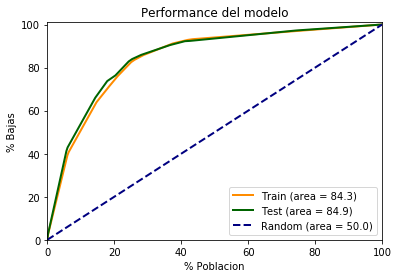

In [36]:
##### ROC
strHTML = "<h3 align='left' style='padding: 2px'>:3: Performance</h2>"
strHTML += "<p>Se utilizo el 90 por ciento de los datos para entrenar el modeo y el 10 por ciento para validarlo.</p>"
strHTML += "<p>Se obtiene un modelo bastante mas sencillo que el anterior (version 2.0) con una performance muy aceptable. <br><br></p>"
display(HTML(strHTML))

plt.figure()
lw = 2
#plt.plot(false_positive_rate, true_positive_rate, color='darkorange',
#         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(gain_x, gain_y, color='darkorange',
         lw=lw, label='Train (area = %0.1f)' % (roc_auc * 100))
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])

plt.plot(false_positive_rate*100, true_positive_rate*100, color='darkgreen',
         lw=lw, label='Test (area = %0.1f)' % (roc_auc2 * 100))

plt.plot([0, 100], [0, 100], color='navy', lw=lw, linestyle='--', label = 'Random (area = %0.1f)' % 50)
plt.xlim([0.0, 100.0])
plt.ylim([0.0, 101.0])

plt.xlabel('% Poblacion')
plt.ylabel('% Bajas')
plt.title('Performance del modelo')
plt.legend(loc="lower right")
plt.show()

